# Flight_Delay_Prediction

# 1. Original Flight Data Proccesing 

•Loading 'flights.csv' Data to generalize

•Combining all the flight data: 'flights.csv','airports.csv'

•Removing the rows that have missing data in their columns

•Extracting only the required columns

•Saving the filtered data from  'flights.csv' as 'flight_data_cleaned.csv'

# Prerequisites

In [2]:
#--------------------------------------------Import tools---------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install missingno
import missingno as msno

In [2]:
# To load the files 
df_flight = pd.read_csv('flights.csv', dtype = str)
df_airport = pd.read_csv("airports.csv", dtype =str)
df_airlines = pd.read_csv("airlines.csv", dtype = str)

# Data Analysis

In [3]:
# Data size
df_flight.shape

(5819079, 31)

In [4]:
df_flight.describe

<bound method NDFrame.describe of          YEAR MONTH DAY DAY_OF_WEEK AIRLINE FLIGHT_NUMBER TAIL_NUMBER  \
0        2015     1   1           4      AS            98      N407AS   
1        2015     1   1           4      AA          2336      N3KUAA   
2        2015     1   1           4      US           840      N171US   
3        2015     1   1           4      AA           258      N3HYAA   
4        2015     1   1           4      AS           135      N527AS   
...       ...   ...  ..         ...     ...           ...         ...   
5819074  2015    12  31           4      B6           688      N657JB   
5819075  2015    12  31           4      B6           745      N828JB   
5819076  2015    12  31           4      B6          1503      N913JB   
5819077  2015    12  31           4      B6           333      N527JB   
5819078  2015    12  31           4      B6           839      N534JB   

        ORIGIN_AIRPORT DESTINATION_AIRPORT SCHEDULED_DEPARTURE  ...  \
0                 

In [5]:
# Data size
df_airport.shape

(322, 7)

In [6]:
df_airport.describe

<bound method NDFrame.describe of     IATA_CODE                              AIRPORT  \
0         ABE  Lehigh Valley International Airport   
1         ABI             Abilene Regional Airport   
2         ABQ    Albuquerque International Sunport   
3         ABR            Aberdeen Regional Airport   
4         ABY   Southwest Georgia Regional Airport   
..        ...                                  ...   
317       WRG                     Wrangell Airport   
318       WYS               Westerly State Airport   
319       XNA  Northwest Arkansas Regional Airport   
320       YAK                      Yakutat Airport   
321       YUM           Yuma International Airport   

                               CITY STATE COUNTRY  LATITUDE   LONGITUDE  
0                         Allentown    PA     USA  40.65236   -75.44040  
1                           Abilene    TX     USA  32.41132   -99.68190  
2                       Albuquerque    NM     USA  35.04022  -106.60919  
3                    

# Marging two dataset: 'flights.csv' and 'airports.csv'

In [7]:
# Add the State/City Columns from "airports.csv", "airlines.csv"
airport_codes_to_names = dict(zip(df_airport['IATA_CODE'], df_airport['AIRPORT']))
airport_codes_to_cities = dict(zip(df_airport['IATA_CODE'], df_airport['CITY']))
airport_codes_to_states = dict(zip(df_airport['IATA_CODE'], df_airport['STATE']))

df_flight['Ori_City'] = df_flight['ORIGIN_AIRPORT'].apply(lambda x: airport_codes_to_cities[x] if x in airport_codes_to_cities else None)
df_flight['Desti_City'] = df_flight['DESTINATION_AIRPORT'].apply(lambda x: airport_codes_to_cities[x] if x in airport_codes_to_cities else None)
df_flight['O_STATE'] = df_flight['ORIGIN_AIRPORT'].apply(lambda x: airport_codes_to_states[x] if x in airport_codes_to_states else None)
df_flight['D_STATE'] = df_flight['DESTINATION_AIRPORT'].apply(lambda x: airport_codes_to_states[x] if x in airport_codes_to_states else None)

In [8]:
# Original columns in 'flights.csv' "airports.csv"
df_flight.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'Ori_City', 'Desti_City',
       'O_STATE', 'D_STATE'],
      dtype='object')

In [9]:
# Original (5819079, 33)
df_flight.shape

(5819079, 35)

# Dropping the unnecessary columns

In [10]:
# Dropping the unnecessary columns
df_flight.drop(['YEAR', 'DAY','DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY','FLIGHT_NUMBER', 'TAIL_NUMBER','TAXI_OUT', 'WHEELS_OFF','WHEELS_ON',
       'TAXI_IN','SCHEDULED_TIME'], axis=1, inplace=True)

df_flight.head()

,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,Ori_City,Desti_City,O_STATE,D_STATE
0,1,4,AS,ANC,SEA,0005,2354,-11,194,169,1448,0430,0408,-22,Anchorage,Seattle,AK,WA
1,1,4,AA,LAX,PBI,0010,0002,-8,279,263,2330,0750,0741,-9,Los Angeles,West Palm Beach,CA,FL
2,1,4,US,SFO,CLT,0020,0018,-2,293,266,2296,0806,0811,5,San Francisco,Charlotte,CA,NC
3,1,4,AA,LAX,MIA,0020,0015,-5,281,258,2342,0805,0756,-9,Los Angeles,Miami,CA,FL
4,1,4,AS,SEA,ANC,0025,0024,-1,215,199,1448,0320,0259,-21,Seattle,Anchorage,WA,AK


In [11]:
# Important Columns are left for this research.
df_flight.columns

Index(['MONTH', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'Ori_City',
       'Desti_City', 'O_STATE', 'D_STATE'],
      dtype='object')

# Visualizing and Cleaning Missing Data

In [12]:
# INSPECTION OF MISSING VALUES
(df_flight.isnull().sum(axis=0))

MONTH                       0
DAY_OF_WEEK                 0
AIRLINE                     0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          86153
DEPARTURE_DELAY         86153
ELAPSED_TIME           105071
AIR_TIME               105071
DISTANCE                    0
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            92513
ARRIVAL_DELAY          105071
Ori_City               486165
Desti_City             486165
O_STATE                486165
D_STATE                486165
dtype: int64

AxesSubplot(0.125,0.11;0.698618x0.77)


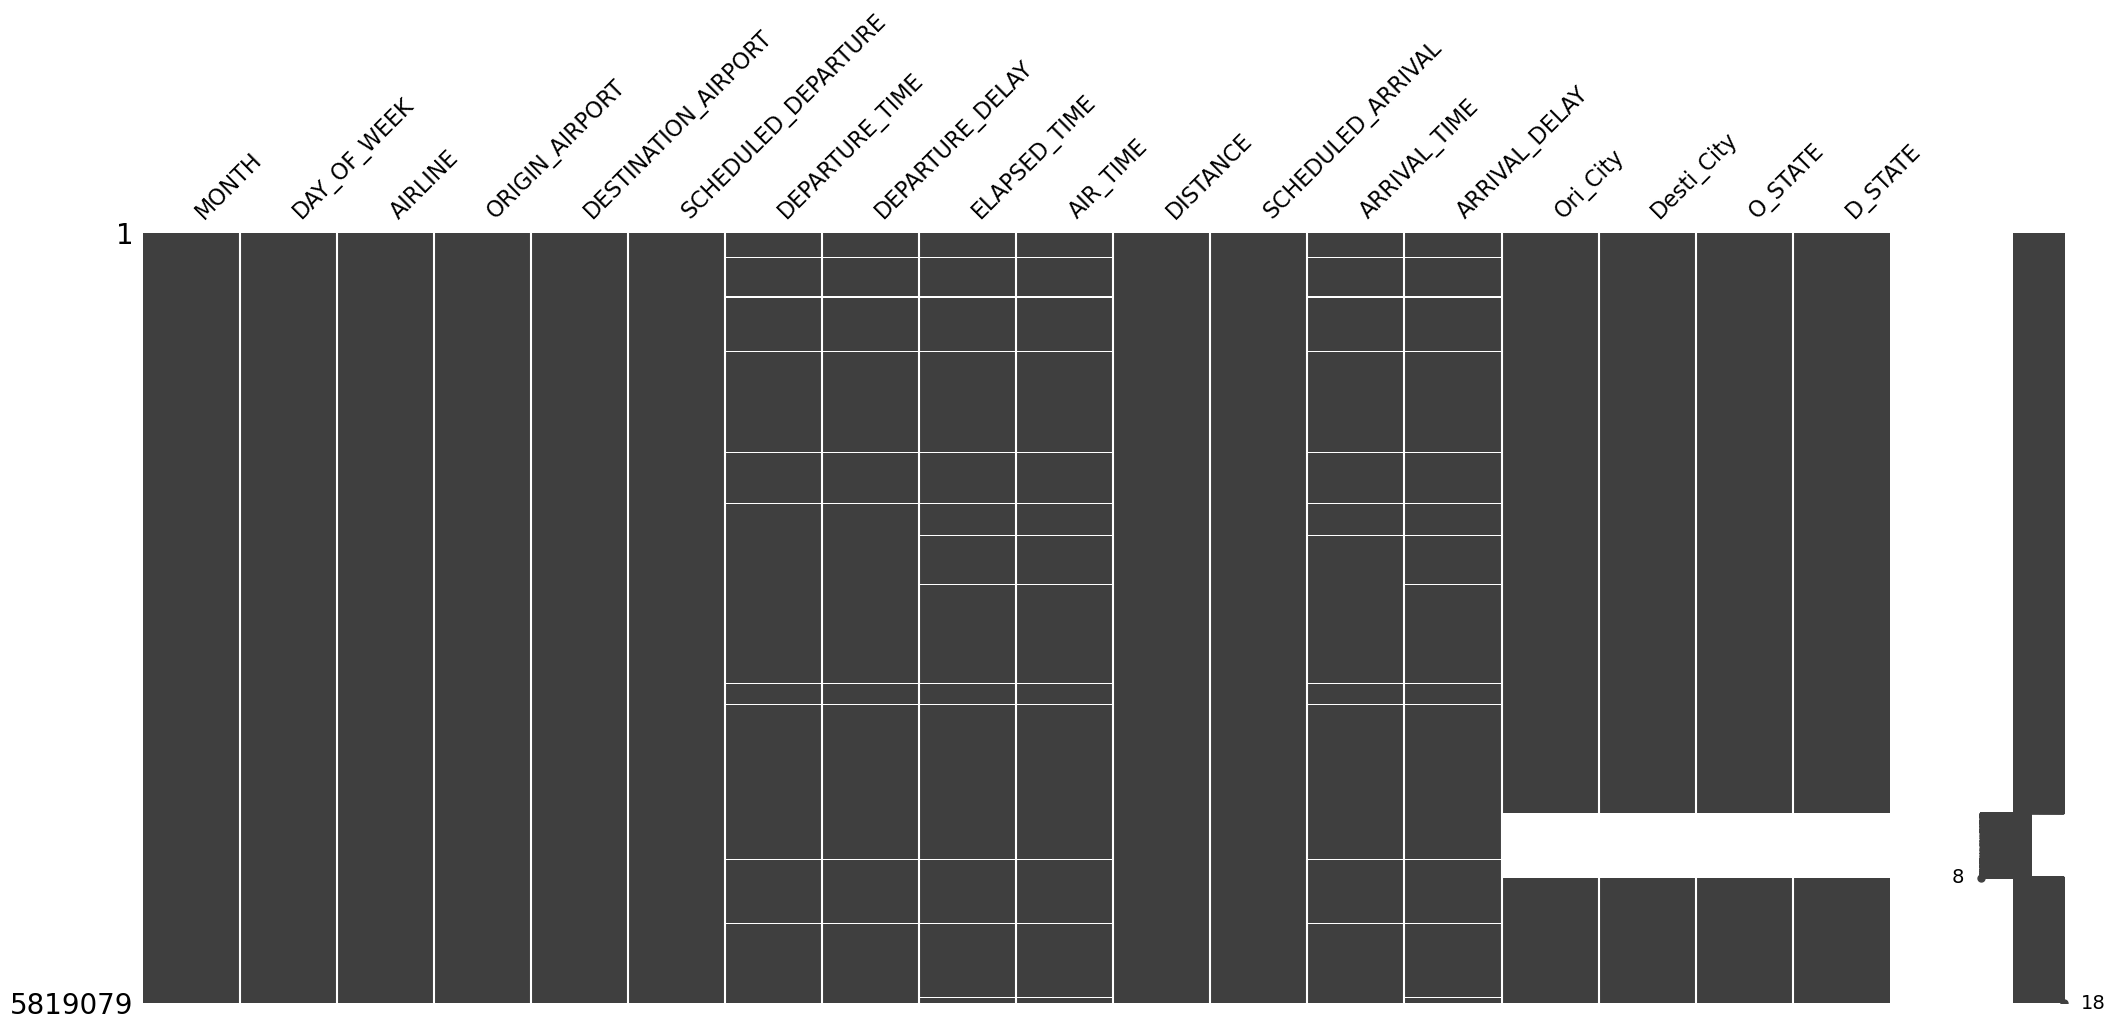

In [13]:
# Visualise the missing data
print(msno.matrix(df_flight))

In [14]:
# Clean the NaN valuess : df_flight ---->>>> df_flight_cleaned 
df_flight_cleaned = df_flight.dropna(axis= 0, how='any')
df_flight_cleaned.head()

,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,Ori_City,Desti_City,O_STATE,D_STATE
0,1,4,AS,ANC,SEA,0005,2354,-11,194,169,1448,0430,0408,-22,Anchorage,Seattle,AK,WA
1,1,4,AA,LAX,PBI,0010,0002,-8,279,263,2330,0750,0741,-9,Los Angeles,West Palm Beach,CA,FL
2,1,4,US,SFO,CLT,0020,0018,-2,293,266,2296,0806,0811,5,San Francisco,Charlotte,CA,NC
3,1,4,AA,LAX,MIA,0020,0015,-5,281,258,2342,0805,0756,-9,Los Angeles,Miami,CA,FL
4,1,4,AS,SEA,ANC,0025,0024,-1,215,199,1448,0320,0259,-21,Seattle,Anchorage,WA,AK


In [15]:
# INSPECTION OF MISSING VALUES
(df_flight_cleaned.isnull().sum(axis=0))

MONTH                  0
DAY_OF_WEEK            0
AIRLINE                0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
Ori_City               0
Desti_City             0
O_STATE                0
D_STATE                0
dtype: int64

AxesSubplot(0.125,0.11;0.698618x0.77)


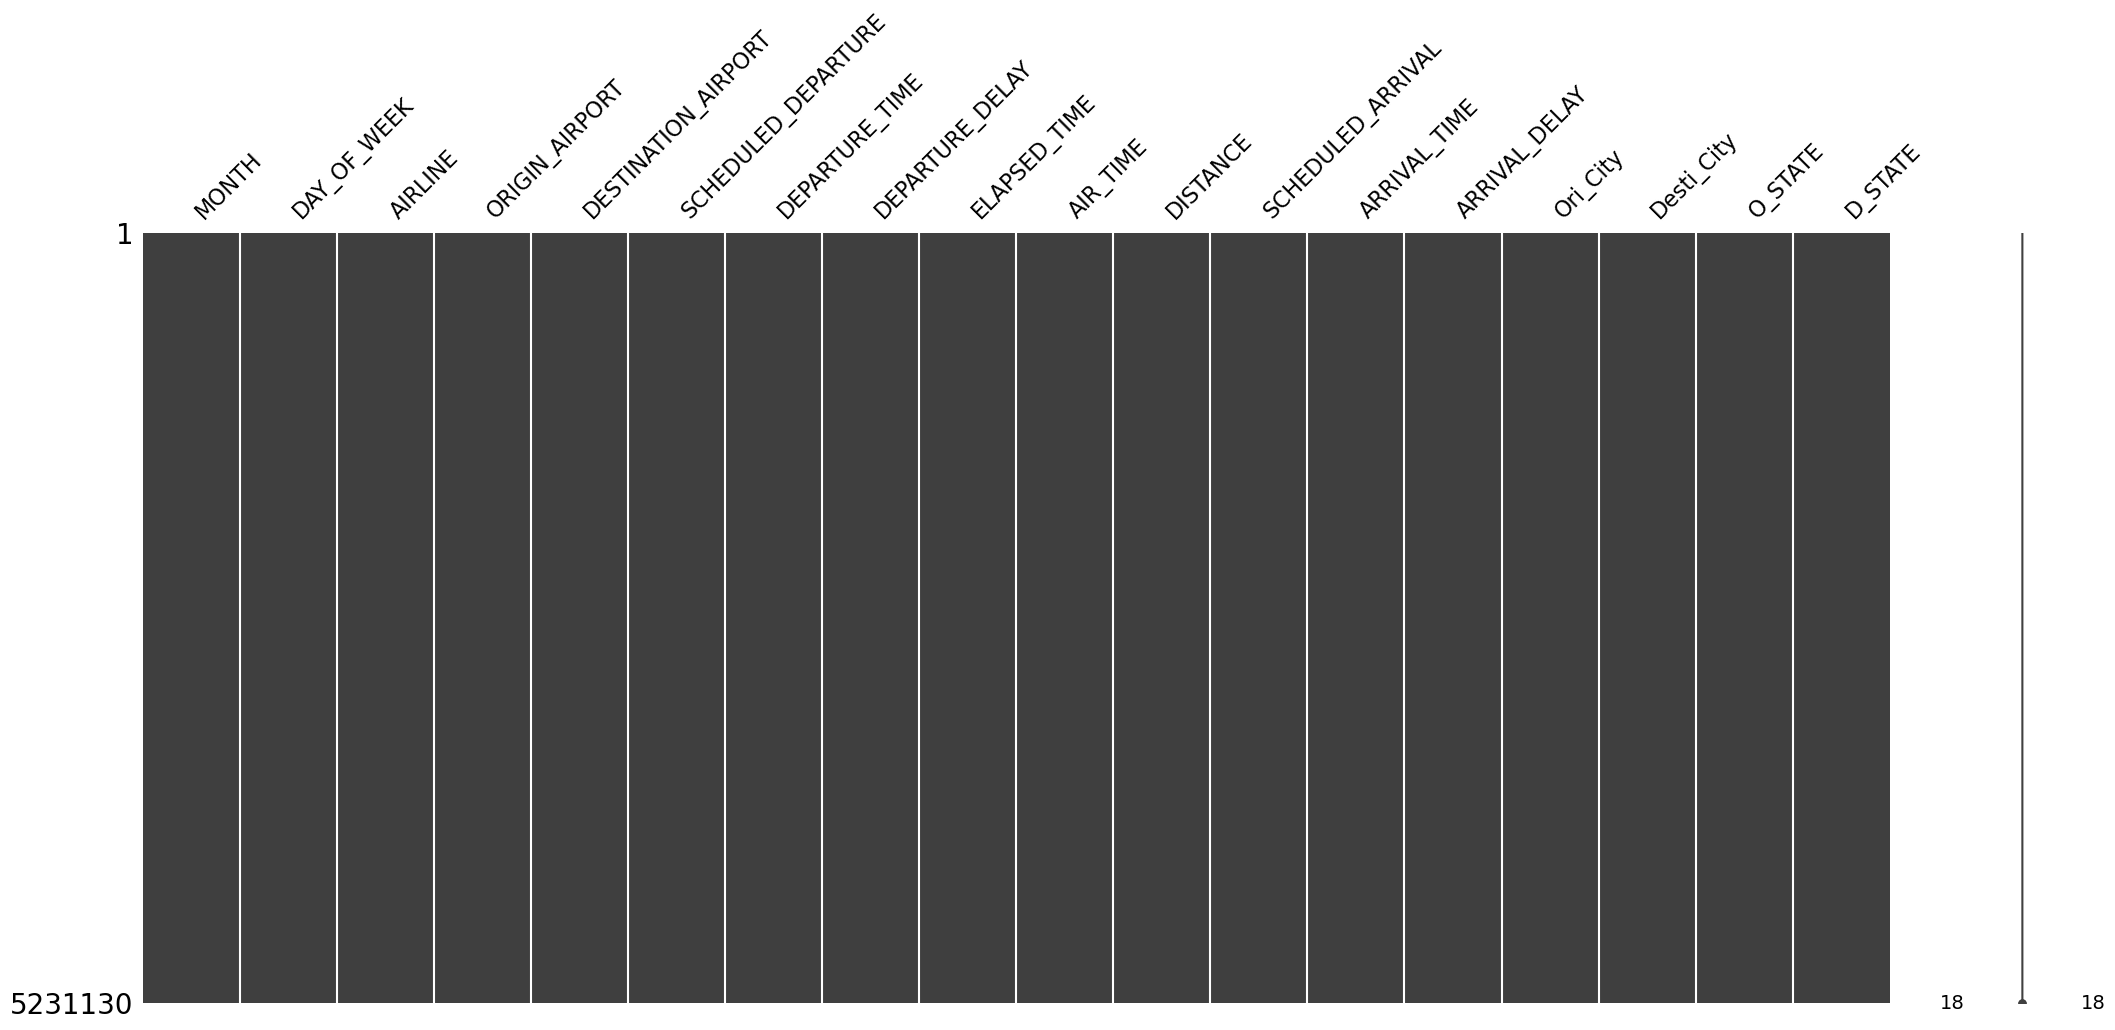

In [16]:
# Visualise the missing data
print(msno.matrix(df_flight_cleaned))

# Storing the cleaned dataset 'df_flight_cleaned' as a new dataset.

In [ ]:
# New dataset for next proccess
df_flight_cleaned.to_csv('flight_data_cleaned.csv', index=False) 

-------------------------------------------------------------------------------------------------------------------

# 2. Modified Data Processing and Regression

•
•Covert the time format hhmm to hh:mm
•Pattern visualization in data
•Encosion
•Regressions
•

# Prerequisites

In [7]:
#--------------------------------------------Import tools---------------------------------------------------
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor


In [19]:
df_flight_cleaned = pd.read_csv('flight_data_cleaned.csv', dtype = str)

In [20]:
df_flight_cleaned.columns

Index(['SCHEDULED_DATE', 'MONTH', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'Ori_City',
       'Desti_City', 'O_STATE', 'D_STATE', 'SCHEDULED_DATE_numeric'],
      dtype='object')

# Covert the time format hhmm to hh:mm

In [21]:
df_flight_cleaned['SCHEDULED_DEPARTURE'] = df_flight_cleaned['SCHEDULED_DEPARTURE'].astype(str).apply(lambda x: "{}:{}".format(x[:2].zfill(2), x[2:].zfill(2)))
df_flight_cleaned['SCHEDULED_ARRIVAL'] = df_flight_cleaned['SCHEDULED_ARRIVAL'].astype(str).apply(lambda x: "{}:{}".format(x[:2].zfill(2), x[2:].zfill(2)))
df_flight_cleaned['DEPARTURE_TIME'] = df_flight_cleaned['DEPARTURE_TIME'].astype(str).apply(lambda x: "{}:{}".format(x[:2].zfill(2), x[2:].zfill(2)))
df_flight_cleaned['ARRIVAL_TIME'] = df_flight_cleaned['ARRIVAL_TIME'].astype(str).apply(lambda x: "{}:{}".format(x[:2].zfill(2), x[2:].zfill(2)))

Applying hh:mm time format in order to slice only hour.

In [22]:
# Change the time duration 0-24 to 1-24
def convert_time_column(df, col_name):
    # replace 24 with 0
    df_flight_cleaned[col_name] = df_flight_cleaned[col_name].replace('24:', '00:', regex=True)
    # extract hour from timestamp column
    hour_col_name = col_name + '_HOUR'
    df_flight_cleaned[hour_col_name] = pd.to_datetime(df_flight_cleaned[col_name]).dt.hour
    # exclude 0 and include 24 to get a range of 1-24
    df_flight_cleaned[hour_col_name] = df_flight_cleaned[hour_col_name].apply(lambda x: x+1 if x != 23 else 24).replace(0, 1)
    return df_flight_cleaned

# call the function for each column
cols_to_convert = ['DEPARTURE_TIME', 'ARRIVAL_TIME', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL']
for col in cols_to_convert:
    df_flight_cleaned = convert_time_column(df_flight_cleaned, col)

The time duration must be 1-24, otherwise there will be 25 hours- machine counts from 0-.

In [23]:
# Check the time duration
cols_to_check = ['DEPARTURE_TIME_HOUR', 'ARRIVAL_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR']

for col in cols_to_check:
    col_min = df_flight_cleaned[col].min()
    col_max = df_flight_cleaned[col].max()
    print(f"{col}: min={col_min}, max={col_max}")

DEPARTURE_TIME_HOUR: min=1, max=24
ARRIVAL_TIME_HOUR: min=1, max=24
SCHEDULED_DEPARTURE_HOUR: min=1, max=24
SCHEDULED_ARRIVAL_HOUR: min=1, max=24


In [24]:
cols_to_check = ['DEPARTURE_TIME_HOUR', 'ARRIVAL_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR']

for col in cols_to_check:
    col_total = df_flight_cleaned[col].unique()
    #col = df_flight_cleaned[col].max()
    print(f"{col}: total={col_total}")

DEPARTURE_TIME_HOUR: total=[24  1  2  3  4  6  5  8  7  9 10 13 11 12 15 18 16 14 17 19 22 20 21 23]
ARRIVAL_TIME_HOUR: total=[ 5  8  9  3  7  6 10 11 14 13 12 15 16 20 19 17 21 18 23  1 22 24  4  2]
SCHEDULED_DEPARTURE_HOUR: total=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
SCHEDULED_ARRIVAL_HOUR: total=[ 5  8  9  4  7  6 10 11 12 15 14 13 16 19 17 18 20 21 22 23 24  1  2  3]


In [25]:
df_flight_cleaned = df_flight_cleaned.drop(['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME'], axis=1)

In [26]:
print(df_flight_cleaned)

              SCHEDULED_DATE MONTH DAY_OF_WEEK AIRLINE ORIGIN_AIRPORT  \
0        2015-01-01 00:05:00     1           4      AS            ANC   
1        2015-01-01 00:10:00     1           4      AA            LAX   
2        2015-01-01 00:20:00     1           4      US            SFO   
3        2015-01-01 00:20:00     1           4      AA            LAX   
4        2015-01-01 00:25:00     1           4      AS            SEA   
...                      ...   ...         ...     ...            ...   
5231125  2015-12-31 23:59:00    12           4      B6            LAX   
5231126  2015-12-31 23:59:00    12           4      B6            JFK   
5231127  2015-12-31 23:59:00    12           4      B6            JFK   
5231128  2015-12-31 23:59:00    12           4      B6            MCO   
5231129  2015-12-31 23:59:00    12           4      B6            JFK   

        DESTINATION_AIRPORT DEPARTURE_DELAY ELAPSED_TIME AIR_TIME DISTANCE  \
0                       SEA             -11  

In [27]:
df_flight_cleaned.columns

Index(['SCHEDULED_DATE', 'MONTH', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'ARRIVAL_DELAY', 'Ori_City', 'Desti_City', 'O_STATE',
       'D_STATE', 'SCHEDULED_DATE_numeric', 'DEPARTURE_TIME_HOUR',
       'ARRIVAL_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR',
       'SCHEDULED_ARRIVAL_HOUR'],
      dtype='object')

In [28]:
print(df_flight_cleaned.dtypes)

SCHEDULED_DATE              object
MONTH                       object
DAY_OF_WEEK                 object
AIRLINE                     object
ORIGIN_AIRPORT              object
DESTINATION_AIRPORT         object
DEPARTURE_DELAY             object
ELAPSED_TIME                object
AIR_TIME                    object
DISTANCE                    object
ARRIVAL_DELAY               object
Ori_City                    object
Desti_City                  object
O_STATE                     object
D_STATE                     object
SCHEDULED_DATE_numeric      object
DEPARTURE_TIME_HOUR          int64
ARRIVAL_TIME_HOUR            int64
SCHEDULED_DEPARTURE_HOUR     int64
SCHEDULED_ARRIVAL_HOUR       int64
dtype: object


•These columns are supposed to be in numerical type: 'DEPARTURE_TIME_HOUR', 'ARRIVAL_TIME_HOUR', 'AIR_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'ELAPSED_TIME' .

# Data Conversion
- Categorical and Numerical Data

In [29]:
df_flight_cleaned['DEPARTURE_TIME_HOUR'] = pd.to_numeric(df_flight_cleaned['DEPARTURE_TIME_HOUR'])
df_flight_cleaned['ARRIVAL_TIME_HOUR'] = pd.to_numeric(df_flight_cleaned['ARRIVAL_TIME_HOUR'])
df_flight_cleaned['AIR_TIME'] = pd.to_numeric(df_flight_cleaned['AIR_TIME'])
df_flight_cleaned['DISTANCE'] = pd.to_numeric(df_flight_cleaned['DISTANCE'])
df_flight_cleaned['SCHEDULED_ARRIVAL_HOUR'] = pd.to_numeric(df_flight_cleaned['SCHEDULED_ARRIVAL_HOUR'])
df_flight_cleaned['SCHEDULED_DEPARTURE_HOUR'] = pd.to_numeric(df_flight_cleaned['SCHEDULED_DEPARTURE_HOUR'])
df_flight_cleaned['DEPARTURE_DELAY'] = pd.to_numeric(df_flight_cleaned['DEPARTURE_DELAY'])
df_flight_cleaned['ARRIVAL_DELAY'] = pd.to_numeric(df_flight_cleaned['ARRIVAL_DELAY'])
df_flight_cleaned['ELAPSED_TIME'] = pd.to_numeric(df_flight_cleaned['ELAPSED_TIME'])


In [30]:
print(df_flight_cleaned.columns)

Index(['SCHEDULED_DATE', 'MONTH', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'ARRIVAL_DELAY', 'Ori_City', 'Desti_City', 'O_STATE',
       'D_STATE', 'SCHEDULED_DATE_numeric', 'DEPARTURE_TIME_HOUR',
       'ARRIVAL_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR',
       'SCHEDULED_ARRIVAL_HOUR'],
      dtype='object')


In [31]:
print(df_flight_cleaned.dtypes)

SCHEDULED_DATE              object
MONTH                       object
DAY_OF_WEEK                 object
AIRLINE                     object
ORIGIN_AIRPORT              object
DESTINATION_AIRPORT         object
DEPARTURE_DELAY              int64
ELAPSED_TIME                 int64
AIR_TIME                     int64
DISTANCE                     int64
ARRIVAL_DELAY                int64
Ori_City                    object
Desti_City                  object
O_STATE                     object
D_STATE                     object
SCHEDULED_DATE_numeric      object
DEPARTURE_TIME_HOUR          int64
ARRIVAL_TIME_HOUR            int64
SCHEDULED_DEPARTURE_HOUR     int64
SCHEDULED_ARRIVAL_HOUR       int64
dtype: object


# Data cleaning

In [32]:
# Drop rows with negative departure delay
df_flight_cleaned = df_flight_cleaned[df_flight_cleaned['DEPARTURE_DELAY'] >= 0]

# Drop rows with negative arrival delay
df_flight_cleaned = df_flight_cleaned[df_flight_cleaned['ARRIVAL_DELAY'] >= 0]

• Negative Numbers in 'Delay' columns stand for no delay.

In [33]:
df_flight_cleaned.shape

(2269161, 20)

In [34]:
print(df_flight_cleaned.dtypes)

SCHEDULED_DATE              object
MONTH                       object
DAY_OF_WEEK                 object
AIRLINE                     object
ORIGIN_AIRPORT              object
DESTINATION_AIRPORT         object
DEPARTURE_DELAY              int64
ELAPSED_TIME                 int64
AIR_TIME                     int64
DISTANCE                     int64
ARRIVAL_DELAY                int64
Ori_City                    object
Desti_City                  object
O_STATE                     object
D_STATE                     object
SCHEDULED_DATE_numeric      object
DEPARTURE_TIME_HOUR          int64
ARRIVAL_TIME_HOUR            int64
SCHEDULED_DEPARTURE_HOUR     int64
SCHEDULED_ARRIVAL_HOUR       int64
dtype: object


# Visualise a Patterns in Data

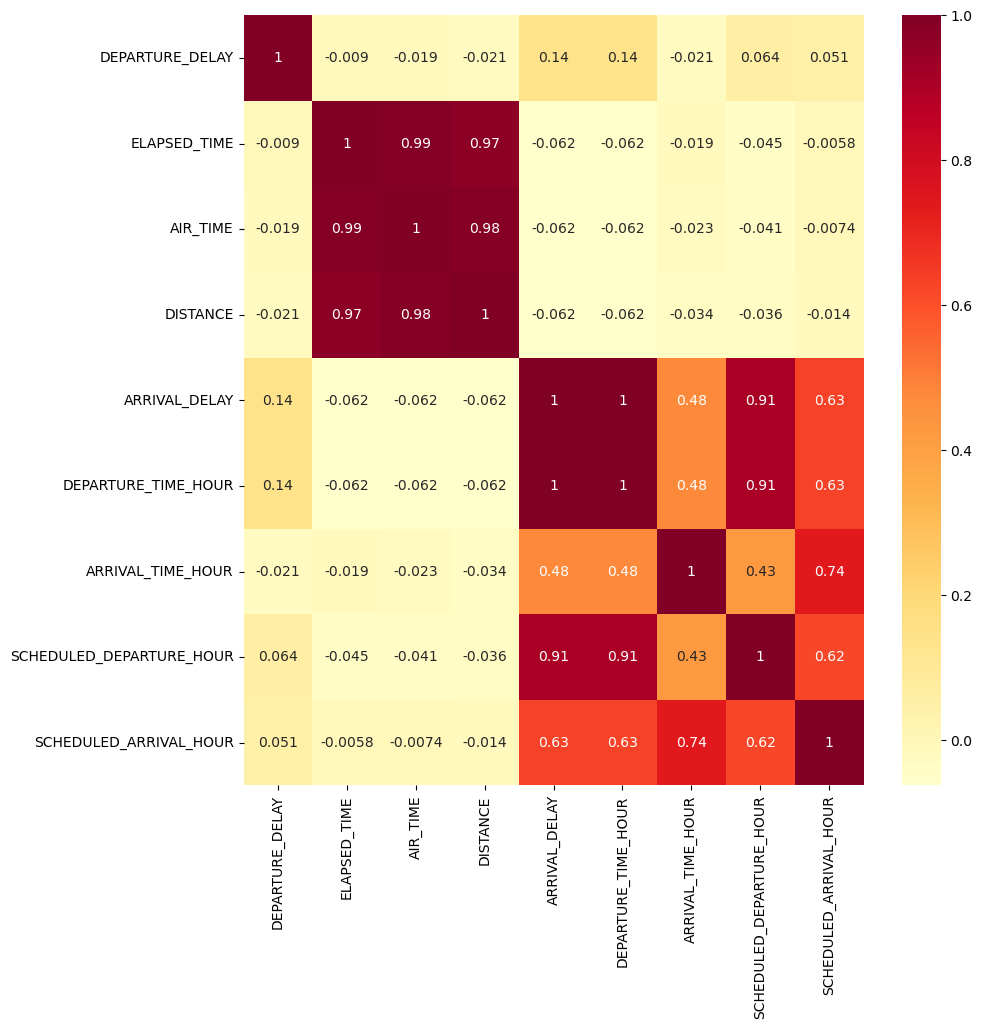

In [35]:
corr_matrix = df_flight_cleaned.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.show()

•The target is 'Arrival_delay'. 

•'Arrival_delay' is highly correrated with 'DEPARTURE_TIME_HOUR','ARRIVAL_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR' and  'SCHEDULED_ARRIVAL_HOUR'.

# Hot Encoding

In [36]:
# Separate the features and target variables
X_train = df_flight_cleaned[['MONTH', 'DAY_OF_WEEK', 'AIR_TIME', 'DISTANCE', 'ELAPSED_TIME', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_DELAY', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'O_STATE',
       'D_STATE']]

# Define the dependent variables (targets)
#y_arr_delay = df_flight_cleaned['ARRIVAL_DELAY']

•'Departure delay', 'DEPARTURE_TIME_HOUR', 'ARRIVAL_TIME_HOUR', 'SCHEDULED_DATE', 'SCHEDULED_DATE_numeric' are avoided to use so as to bypass complexity and bias.

•Also 'Ori_City', 'Desti_City' are not selcted as here becouse the machine we are using does not have enough power.

In [37]:
X_train.shape

(2269161, 12)

In [38]:
encode = pd.get_dummies(data=X_train, drop_first=True)

In [39]:
encode.columns

Index(['AIR_TIME', 'DISTANCE', 'ELAPSED_TIME', 'ARRIVAL_DELAY',
       'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'MONTH_11',
       'MONTH_12', 'MONTH_2', 'MONTH_3',
       ...
       'D_STATE_TN', 'D_STATE_TX', 'D_STATE_UT', 'D_STATE_VA', 'D_STATE_VI',
       'D_STATE_VT', 'D_STATE_WA', 'D_STATE_WI', 'D_STATE_WV', 'D_STATE_WY'],
      dtype='object', length=770)

In [40]:
encode.head()

,AIR_TIME,DISTANCE,ELAPSED_TIME,ARRIVAL_DELAY,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,MONTH_11,MONTH_12,MONTH_2,MONTH_3,...,D_STATE_TN,D_STATE_TX,D_STATE_UT,D_STATE_VA,D_STATE_VI,D_STATE_VT,D_STATE_WA,D_STATE_WI,D_STATE_WV,D_STATE_WY
7,228,2125,249,0,1,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,186,1747,203,0,1,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,188,1535,210,0,1,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,128,1139,143,1,1,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,166,1487,220,1,2,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Spliting

Training:60%

Tuning:20%

Test:20%

In [41]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into training and temporary sets
train_data, temp_data = train_test_split(encode, test_size=0.4, random_state=42)

# Split the temporary set into tuning and test sets
tuning_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Check the size of each dataset
print("Training data size:", len(train_data))
print("Tuning data size:", len(tuning_data))
print("Test data size:", len(test_data))

* We have splited the data into 60/20/20, but the test data will not be used for the machine learning purpose, unless we are unsatisfied by the results.

In [ ]:
# Save the test data to a new file
train_data.to_csv('train_flight_data11.csv', index=False)
tuning_data.to_csv('tuning_flight_data11.csv', index=False)
test_data.to_csv('test_flight_data11.csv', index=False)

# Training Different Regression Models

•Simple Linear Regression

•Suport Vector Regression- LinearSVR-

•Deciscion Trees

# Simple Linear Regression

In [3]:
# Load the train data from the CSV file
train_data = pd.read_csv('train_flight_data11.csv')

In [43]:
train_data.columns

Index(['AIR_TIME', 'DISTANCE', 'ELAPSED_TIME', 'ARRIVAL_DELAY',
       'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'MONTH_11',
       'MONTH_12', 'MONTH_2', 'MONTH_3',
       ...
       'D_STATE_TN', 'D_STATE_TX', 'D_STATE_UT', 'D_STATE_VA', 'D_STATE_VI',
       'D_STATE_VT', 'D_STATE_WA', 'D_STATE_WI', 'D_STATE_WV', 'D_STATE_WY'],
      dtype='object', length=770)

In [44]:
# Separate the features and target variables
X_train = train_data.drop(['ARRIVAL_DELAY'], axis=1)
y_arr_delay = train_data['ARRIVAL_DELAY']

In [45]:
# Train a linear regression model for predicting arrival delay
reg_arr = LinearRegression().fit(X_train, y_arr_delay)

In [46]:
# Make predictions using the training set
y_arr_delay_pred = reg_arr.predict(X_train)

In [47]:
# Predict the arrival delay using the trained model
y_pred_arr = reg_arr.predict(X_train)

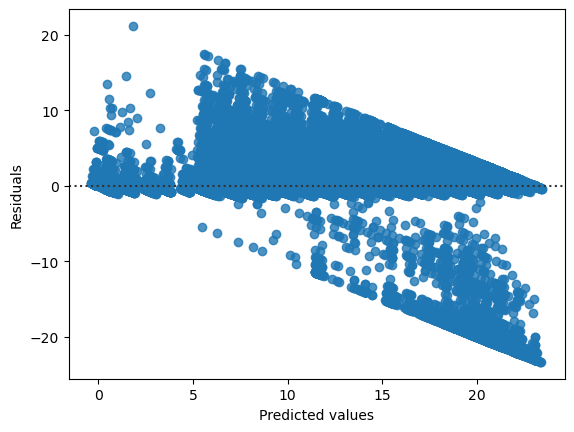

In [48]:
# Create a residual plot
sns.residplot(y_pred_arr, y_arr_delay)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

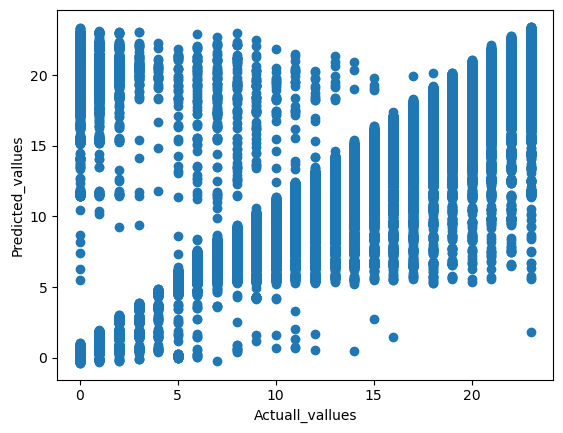

In [49]:
plt.scatter(y_arr_delay, y_pred_arr)
plt.xlabel('Actuall_vallues')
plt.ylabel('Predicted_vallues')
plt.show()

In [50]:
# Calculate the mean squared error
mse_arr_train = mean_squared_error(y_arr_delay, y_arr_delay_pred)

# Calculate the root mean squared error
rmse_arr_train = np.sqrt(mse_arr_train)

# Calculate the R-squared score
r2_arr_train = r2_score(y_arr_delay, y_arr_delay_pred)

print("Arrival delay - Mean Squared Error: ", mse_arr_train)
print("Arrival delay - Root Mean Squared Error: ", rmse_arr_train)
print("Arrival delay - R-squared score: ", r2_arr_train)

Arrival delay - Mean Squared Error:  3.768411755993395
Arrival delay - Root Mean Squared Error:  1.941239747170193
Arrival delay - R-squared score:  0.8366159249883893


In [4]:
# Load the tuning data from the CSV file
tuning_data = pd.read_csv('tuning_flight_data11.csv')

In [52]:
# Separate the features and target variables
X_tuning = tuning_data.drop(['ARRIVAL_DELAY'], axis=1)
y_tuning_arr_delay = tuning_data['ARRIVAL_DELAY']

In [53]:
# Evaluate the models on the tuning set
y_tuning_arr_pred = reg_arr.predict(X_tuning)

In [54]:
# Calculate the mean squared error
mse_arrival = mean_squared_error(y_tuning_arr_delay, y_tuning_arr_pred)

In [55]:
# Calculate the root mean squared error
rmse_arrival = np.sqrt(mse_arrival)

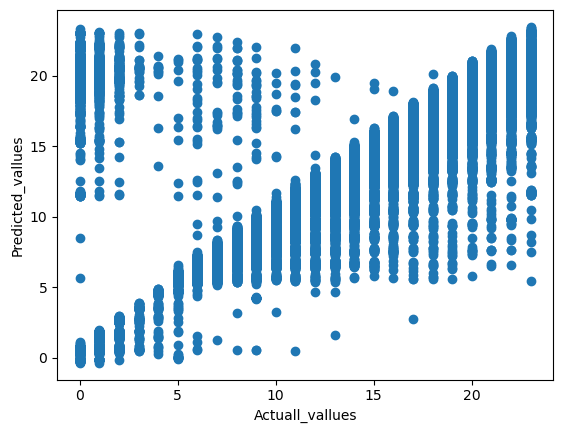

In [56]:
plt.scatter(y_tuning_arr_delay, y_tuning_arr_pred)
plt.xlabel('Actuall_vallues')
plt.ylabel('Predicted_vallues')
plt.show()

In [57]:
# Calculate the R-squared score
r2_arrival = r2_score(y_tuning_arr_delay, y_tuning_arr_pred)

print("Arrival delay - Mean Squared Error: ", mse_arrival)
print("Arrival delay - Root Mean Squared Error: ", rmse_arrival)
print("Arrival delay - R-squared score: ", r2_arrival)

Arrival delay - Mean Squared Error:  3.8141767519656544
Arrival delay - Root Mean Squared Error:  1.9529917439573712
Arrival delay - R-squared score:  0.8347791156379682


# Suport Vector Regression- LinearSVR-

In [5]:
# Separate the features and target variables
X_v_train = train_data.drop(['ARRIVAL_DELAY'], axis=1)
y_v_arr_delay = train_data['ARRIVAL_DELAY']

In [8]:
# Train a LinearSVR model for predicting arrival delay
reg_v_arr = LinearSVR(random_state=42).fit(X_v_train, y_v_arr_delay)

In [9]:
# Separate the features and target variables
X_v_tuning = tuning_data.drop(['ARRIVAL_DELAY'], axis=1)
y_v_tuning_arr_delay = tuning_data['ARRIVAL_DELAY']

In [10]:
# Evaluate the model on the tuning set
y_v_tuning_pred = reg_v_arr.predict(X_v_tuning)

In [11]:
# Calculate the mean squared error
mse_v_tuning = mean_squared_error(y_v_tuning_arr_delay, y_v_tuning_pred)

In [12]:
# Calculate the root mean squared error
rmse_v_tuning = np.sqrt(mse_v_tuning)

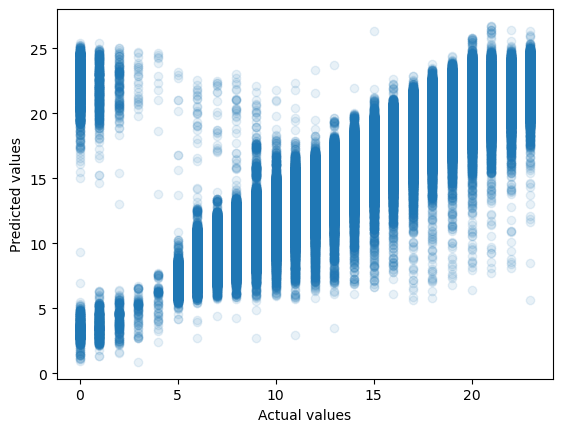

In [13]:
# Plot the predicted values against the actual values
plt.scatter(y_v_tuning_arr_delay, y_v_tuning_pred, alpha=0.1)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [14]:
# Calculate the R-squared score
r2_v_tuning = r2_score(y_v_tuning_arr_delay, y_v_tuning_pred)

print("Arrival delay - Mean Squared Error: ", mse_v_tuning)
print("Arrival delay - Root Mean Squared Error: ", rmse_v_tuning)
print("Arrival delay - R-squared score: ", r2_v_tuning)

Arrival delay - Mean Squared Error:  6.462677623321718
Arrival delay - Root Mean Squared Error:  2.5421796992584373
Arrival delay - R-squared score:  0.7200524826958667


# Deciscion Trees

In [15]:
# Separate the features and target variables
X_t_train = train_data.drop(['ARRIVAL_DELAY'], axis=1)
y_t_arr_delay = train_data['ARRIVAL_DELAY']
X_t_tuning = tuning_data.drop(['ARRIVAL_DELAY'], axis=1)
y_t_tuning_arr_delay = tuning_data['ARRIVAL_DELAY']

In [16]:
# Create a decision tree regressor
tree_reg = DecisionTreeRegressor(random_state=42)

In [17]:
# Train the model on the training set
tree_reg.fit(X_t_train, y_t_arr_delay)

DecisionTreeRegressor(random_state=42)

In [18]:
# Make predictions on the training set
y_t_arr_delay_pred = tree_reg.predict(X_t_train)

In [19]:
# Evaluate the model on the tuning set
y_t_tuning_arr_pred = tree_reg.predict(X_t_tuning)

In [20]:
# Calculate the mean squared error and R-squared score on the training set
mse_t_train = mean_squared_error(y_t_arr_delay, y_t_arr_delay_pred)
r2_t_train = r2_score(y_t_arr_delay, y_t_arr_delay_pred)

print("Decision tree regression - training set:")
print("Mean Squared Error:", mse_t_train)
print("R-squared score:", r2_t_train)

Decision tree regression - training set:
Mean Squared Error: 0.005439482255793138
R-squared score: 0.9997641646310302


In [21]:
# Calculate the mean squared error and R-squared score on the tuning set
mse_t_tuning = mean_squared_error(y_t_tuning_arr_delay, y_t_tuning_arr_pred)
r2_t_tuning = r2_score(y_t_tuning_arr_delay, y_t_tuning_arr_pred)

print("Decision tree regression - tuning set:")
print("Mean Squared Error:", mse_t_tuning)
print("R-squared score:", r2_t_tuning)

Decision tree regression - tuning set:
Mean Squared Error: 5.897763318193125
R-squared score: 0.7445232000096378


# Performance Summary

In [ ]:
# Set name of the regressors as index labels
perf_df.set_index("Regressors", inplace=True)
perf_df